In [1]:
from obelix_ml_pipeline.predictions_on_unseen_substrate import predict_out_of_sample_substrate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

Training and testing classifier
Test size in training (based on K-fold): 0.2
Mean test performance: 0.83 +/- 0.05
Best model performance: 0.98
Best model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Test set performance balanced_accuracy:  0.8333750469277938
Test set confusion matrix:  [[ 43  18]
 [  5 126]]


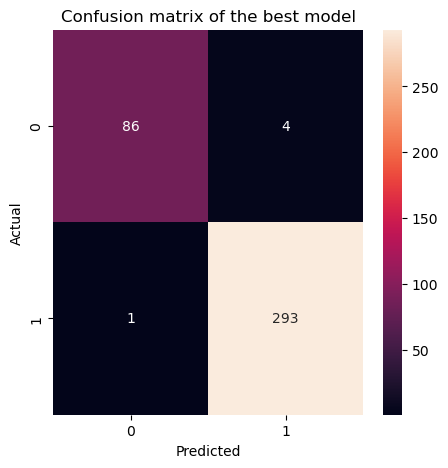

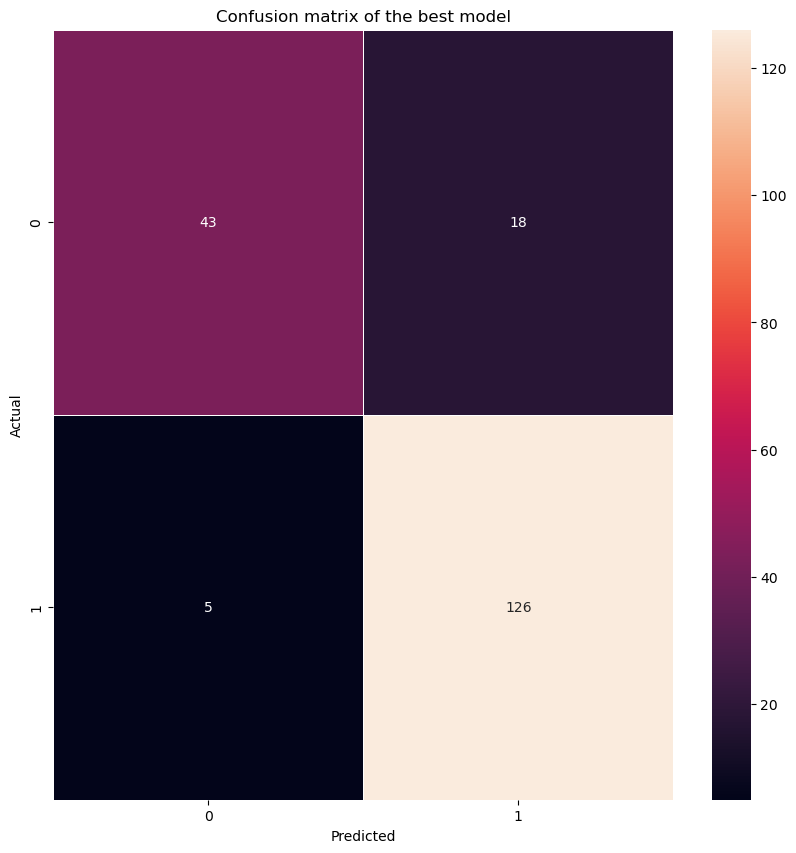

In [6]:
# try classifier with loaded representations
selected_ligand_representations = ['dft_nbd_model']
selected_substrate_representations = ['ecfp']
target = 'Conversion'
target_threshold = 0.8
rf_model = RandomForestClassifier(random_state=42)
scoring = 'balanced_accuracy'
train_splits = 5
n_jobs = 4
binary = True
plot_dendrograms = False
substrate_names_column = 'Substrate'
ligand_numbers_column = 'Ligand#'
list_of_training_substrates = ['SM1', 'SM2']
list_of_test_substrates = ['SM3']
print_ml_results = True
print('Training and testing classifier')
print(f'Test size in training (based on K-fold): {1/train_splits}')
# do the same with general function predict_out_of_sample_substrate
best_model, best_model_performance, training_test_scores_mean, training_test_scores_std, fig_cm, fig_fi, testing_balanced_accuracy_test, testing_confusion_fig, testing_cm_test = predict_out_of_sample_substrate(selected_ligand_representations, selected_substrate_representations, ligand_numbers_column, substrate_names_column, target, target_threshold, train_splits, binary=binary, list_of_training_substrates=list_of_training_substrates, list_of_test_substrates=list_of_test_substrates, rf_model=rf_model, scoring=scoring, print_ml_results=print_ml_results, n_jobs=n_jobs)


In [7]:
fig_fi

Training and testing regression
Test size: 0.2
Mean test performance: 0.45 +/- 0.06
Best model performance: 0.95
Best model parameters: {'bootstrap': False, 'max_depth': 50, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Test set performance r2:  0.5544707208667725


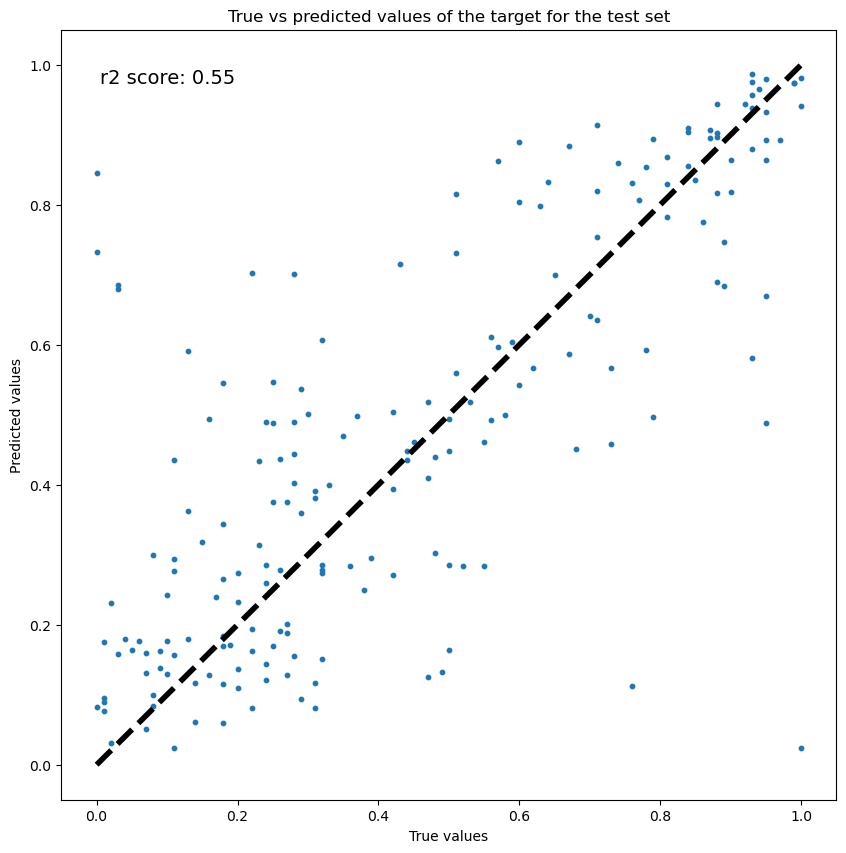

In [8]:
# try regression with loaded representations
target = 'EE'
target_threshold = 0.6
rf_model = RandomForestRegressor(random_state=42)
scoring = 'r2'
binary = False
print('Training and testing regression')
print(f'Test size: {1/train_splits}')
best_model, best_model_performance, training_test_scores_mean, training_test_scores_std, fig_cm, fig_fi, testing_balanced_accuracy_test, testing_confusion_fig, testing_cm_test = predict_out_of_sample_substrate(
    selected_ligand_representations, selected_substrate_representations, ligand_numbers_column,
    substrate_names_column, target, target_threshold, train_splits, binary=binary,
    list_of_training_substrates=list_of_training_substrates, list_of_test_substrates=list_of_test_substrates,
    rf_model=rf_model, scoring=scoring, print_ml_results=print_ml_results, n_jobs=n_jobs)

In [9]:
fig_fi